# Using k-means and k-nearest neighbors 

## Import Packages

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
clients = pd.read_csv('clientSegmentation.csv')
clients.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Wrangling

### Recode gender OR drop it

In [6]:
clientsTrimmed = clients.drop(['CustomerID', 'Gender'], axis=1)

In [7]:
clientsTrimmed.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## k-Means Analysis

In [8]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(clientsTrimmed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

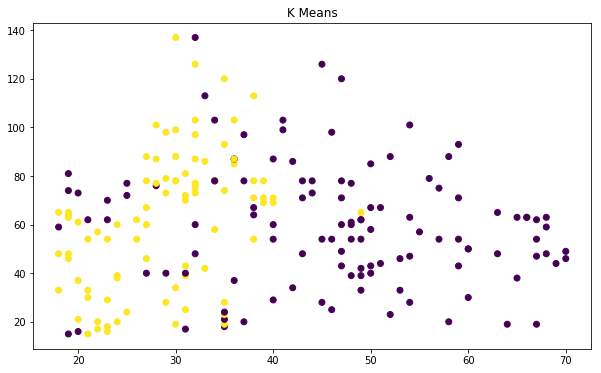

In [9]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(clientsTrimmed['Age'], clientsTrimmed['Annual Income (k$)'], c=kmeans.labels_, cmap='viridis')

*Looks like there is a pretty big age gap - younger cluster together and older cluster together*

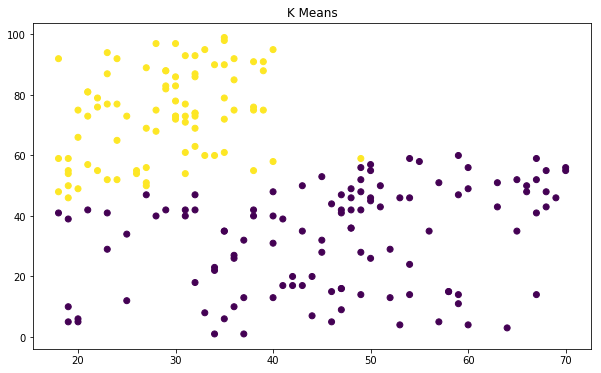

In [10]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(clientsTrimmed['Age'], clientsTrimmed['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')

*It also splits by spending score, regardless of age, but also younger folks pretty much have a higher spending score than older folks*

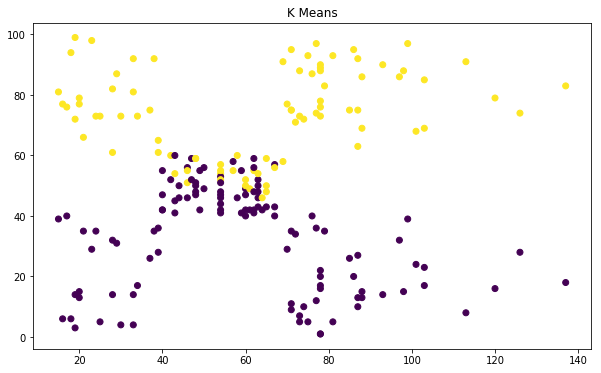

In [11]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(clientsTrimmed['Annual Income (k$)'], clientsTrimmed['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')

*Difficult to differentiate between those with a mid-level spending score and those with an income of 40-60 thousand ish*

### Get labels and add them to your data

In [12]:
kmeans.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [13]:
clientsTrimmed['Category'] = kmeans.labels_

In [14]:
clientsTrimmed.head()

,Age,Annual Income (k$),Spending Score (1-100),Category
0,19,15,39,0
1,21,15,81,1
2,20,16,6,0
3,23,16,77,1
4,31,17,40,0


### Investiage Means by Category

In [15]:
clientsTrimmed.groupby('Category')['Age'].mean()

Category
0    46.165217
1    28.952941
Name: Age, dtype: float64

In [16]:
clientsTrimmed.groupby('Category')['Annual Income (k$)'].mean()

Category
0    59.365217
1    62.176471
Name: Annual Income (k$), dtype: float64

In [17]:
clientsTrimmed.groupby('Category')['Spending Score (1-100)'].mean()

Category
0    32.886957
1    73.623529
Name: Spending Score (1-100), dtype: float64

*So the first group contains older clients who have a slightly lower annual income and a lower spending score. The second group contains younger clientse with a higher annual income and a much higher spending score.*